# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly

### Part 1 
removing all inconsistencies and missing values

In [1]:
!pip install --upgrade numpy

     |████████████████████████████████| 17.3 MB 16 kB/s  eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Z Score
from scipy import stats
# Robust Scaler
from sklearn.preprocessing import RobustScaler

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/RohanDoshi21/PICT-TE-SEM6/main/DSBDAL/datasets/StudentsPerformance_modified.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [159]:
df.isna().sum() ## count of null values per column

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [160]:
# Check for null values in each column
null_columns = df.columns[df.isnull().any()].tolist()
print("Null Columns ",null_columns)
df.dtypes

Null Columns  ['math score', 'reading score', 'writing score']


gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [161]:
for column in null_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('float')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [162]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [163]:
df.ffill()
df.bfill()
df.isna().sum() # using forward fill and backward fill method

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [164]:
# To remove the null values we use this
df.interpolate(inplace=True)
print(empty_arr)
df.isna().sum()

['math score']


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [165]:
df['math score']=df['math score'].fillna(df['math score'].mean())
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [166]:
df.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
5,female,group B,associate's degree,standard,none,71.0,83.0,78.0
6,female,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0


In [167]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [168]:
#rename a column
df.rename(columns={'parental level of education':'Education'},inplace = True)  #note syntax :
df

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


### Part 2 OUTLINERS
OUTLINERS CHECK AND TECHNIQUES TO DEAL WITH THEM

0) Outliners are those data points that are distant from all other observations and lie outside all other distribution
1) First way to do is Z-score (x-U/σ) method, 
    there u is the central value,
    all values that lie after 3rd deviation are considered as outliners

2) IQR - inter quartile range 
    all values after 1.5 times of interquartile range ie above 3rd and below 1 

3) box plot

4) Using scatter points

### 1-Z-score detection
z=(dataPoint - mean /std-deviation)

In [169]:
z = np.abs(stats.zscore(df['math score']))
z

0      0.261771
1      0.099784
2      1.233693
3      1.088121
4      0.477754
         ...   
995    1.125702
996    0.278186
997    0.440173
998    0.045788
999    0.531749
Name: math score, Length: 1000, dtype: float64

In [170]:
#Outliner detection  
arr = np.where(z>3)[0]  
# arr has only the indices where it has z>3 in a list form
print(arr)  
print("total outliners in it ",len(arr))
res=df.iloc[arr]
res

[ 59 431 456 474 980]
total outliners in it  5


,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
431,female,group C,high school,standard,none,123.0,72.0,70.0
456,female,group D,bachelor's degree,standard,none,-89.0,89.0,89.0
474,female,group B,associate's degree,standard,completed,334.0,90.0,91.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


In [171]:
# remove outliners by below command
df_no_outliers = df[(z <= 3)] #for a new column
df=df[z<=3] # changes in same column
df

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


### IQR inter quartile range 
Sure, let me explain how the concepts of Q1 (the first quartile), Q3 (the third quartile), and the Interquartile Range (IQR) work:

Quartiles (Q1, Q3):

1) Q1 (First Quartile): It is the median of the lower half of the dataset. It represents the value below which 25% of the data falls.
2) Q3 (Third Quartile): It is the median of the upper half of the dataset. It represents the value below which 75% of the data falls.
#### Interquartile Range (IQR):

1) The IQR is a measure of statistical dispersion, or in simple terms, it's the range in which the middle 50% of the data values lie.
2) Mathematically, IQR is calculated as the difference between Q3 and Q1: IQR = Q3 - Q1.
3) The IQR is used in detecting outliers. According to the IQR rule, values outside the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR are considered potential outliers.

In [172]:
# IQR 
# Calculate the first quartile (Q1) and third quartile (Q3) for 'fare_amount'
Q1 = df['math score'].quantile(0.25)
Q3 = np.percentile(df['math score'], 75, interpolation='midpoint')

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the results
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 57.0
Q3: 77.75
IQR: 20.75


/tmp/ipykernel_3638/4003734566.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['math score'], 75, interpolation='midpoint')


In [173]:
# Above Upper bound
upper = df['math score'] >= (Q3+1.5*IQR)
 
print("Upper bound:",Q3+1.5*IQR)
print(np.where(upper))
 
# Below Lower bound
lower = df['math score'] <= (Q1-1.5*IQR)
print("Lower bound:", Q1-1.5*IQR)
print(np.where(lower))
# These are the outliers combining Upper Bounded Array and Lowe Bounded Array



Upper bound: 108.875
(array([419, 430, 431, 432, 433]),)
Lower bound: 25.875
(array([144, 337, 783, 838]),)


In [174]:
# print("Original shape",df.shape)
# # Above Upper bound
# upper_bound = Q3 + 1.5 * IQR
# upper_outliers = df['fare_amount'] >= upper_bound

# # Below Lower bound
# lower_bound = Q1 - 1.5 * IQR
# lower_outliers = df['fare_amount'] <= lower_bound

# # Combining Upper and Lower outliers
# all_outliers = upper_outliers | lower_outliers

# # Removing outliers
# df_no_outliers = df[~all_outliers]

# print("Done")
# df_no_outliers.shape

<AxesSubplot:xlabel='reading score', ylabel='math score'>

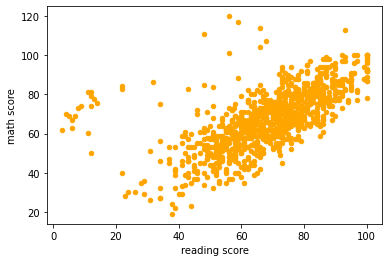

In [175]:
# Scatter plot
df.plot(kind='scatter', x='reading score', y='math score', alpha=1, color='orange')

In [176]:
# Remove outliers using IQR
df = df[(df['math score'] < (Q3+1.5*IQR)) & (df['math score'] > (Q1-1.5*IQR))]
df

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


<AxesSubplot:ylabel='Frequency'>

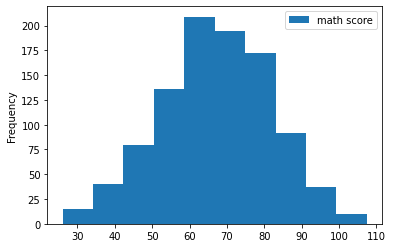

In [177]:
# skewData = df.skew(axis = 1)
# df['skewData'] = skewData
df.plot(kind='hist', y='math score')  # Almost normal

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

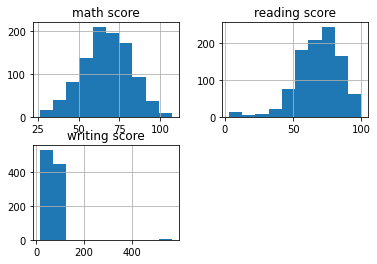

In [178]:
df.hist() # This function will plot historgram for each column

<AxesSubplot:ylabel='Frequency'>

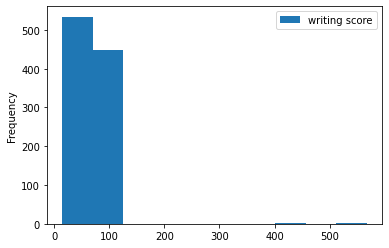

In [197]:
# As we have only considered one column, fare_amount and removed its outliers, we will use it
df.plot(kind='hist', y='writing score') # High Skewness -> due to outliers

In [198]:
df.skew() #return skew of each col

/tmp/ipykernel_3638/2657543212.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew() #return skew of each col


math score            -0.093890
reading score         -0.820877
writing score         11.690982
writing score copy     4.830636
dtype: float64

/tmp/ipykernel_3638/3166470497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score copy'] = np.sqrt(df['writing score'])


,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score,writing score copy
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,8.602325
1,female,group C,some college,standard,completed,69.0,90.0,88.0,9.380832
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,9.643651
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,6.633250
4,male,group C,some college,standard,none,76.0,78.0,75.0,8.660254
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,9.746794
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,7.416198
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,8.062258
998,female,group D,some college,standard,completed,68.0,78.0,77.0,8.774964


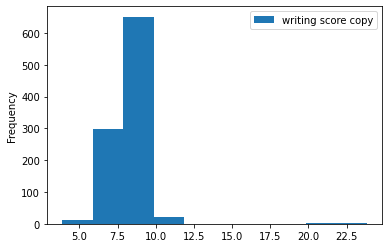

In [199]:
#df['fare_amount'] = np.log(df['fare_amount'])
# Here log wont work as data contains negetive values so use squareroot
df['writing score copy'] = np.sqrt(df['writing score'])
df.plot(kind='hist',y='writing score copy')
df

In [200]:
df.skew()

/tmp/ipykernel_3638/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


math score            -0.093890
reading score         -0.820877
writing score         11.690982
writing score copy     4.830636
dtype: float64

<AxesSubplot:xlabel='math score'>

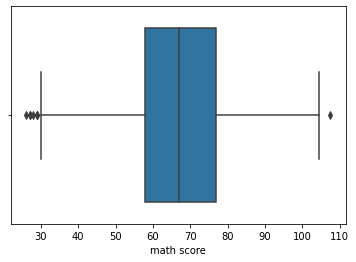

In [201]:
# Visualize Outliers
sns.boxplot(x="math score",data=df)

Text(0.5, 1.0, 'Manish')

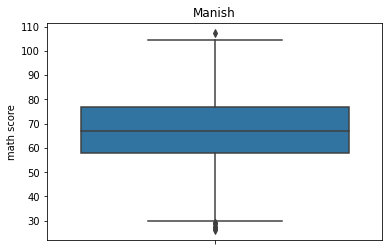

In [202]:
import matplotlib.pyplot
sns.boxplot(y=df['math score'],orient='v')
plt.title("Manish")

/home/student/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

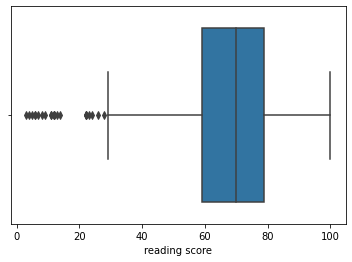

In [196]:
sns.boxplot(df['reading score'])